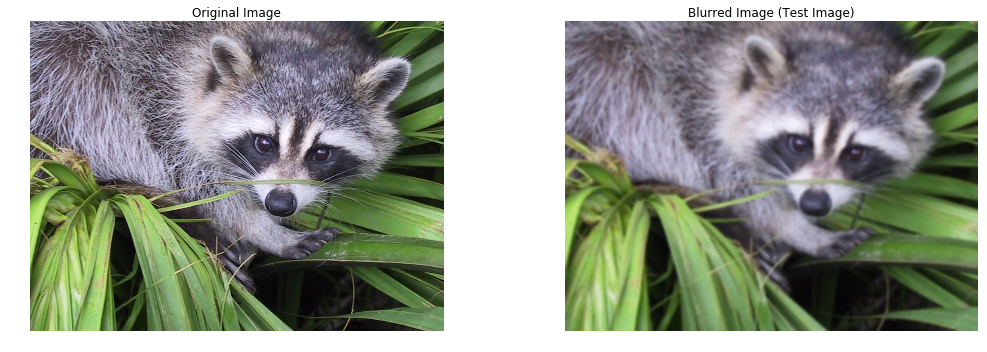

In [1]:
# Test setting
import scipy
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

f = scipy.misc.face()   # test racoon image
blurred_f = ndimage.gaussian_filter(f, [3,3,0])

plt.figure(figsize=(15, 5))
ax1=plt.subplot(121)
plt.imshow(f)
plt.axis('off')
ax1.set_title("Original Image")
ax2=plt.subplot(122)
plt.imshow(blurred_f)
plt.axis('off')
ax2.set_title("Blurred Image (Test Image)")
plt.tight_layout()
plt.show()


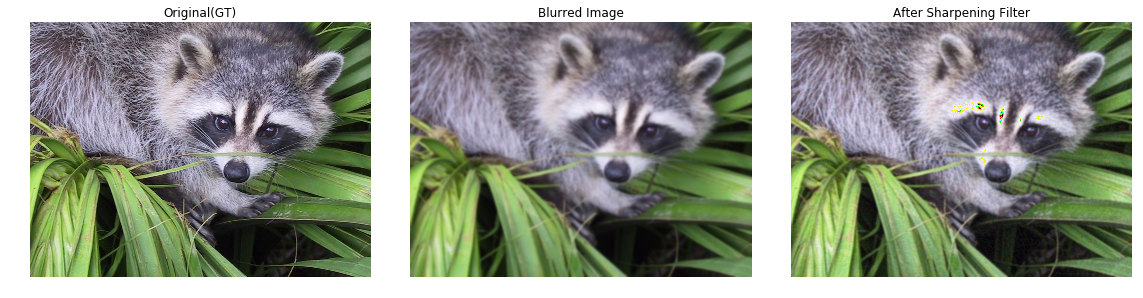

In [2]:
#################  filter 1  #################

# 조금 깨지는 부분 있음. 성능이 제일 안좋은 거 같음 
# alpha로 튜닝 가능..

from scipy import ndimage

def filter_1(img, alpha):
    blurred_img = ndimage.gaussian_filter(img, [1,1,0])
    sharpened = img + alpha * (img - blurred_img)
    return sharpened

###############################################

sharpened_f = filter_1(blurred_f, 8)
plt.figure(figsize=(16, 4))
ax1=plt.subplot(131)
plt.imshow(f)
plt.axis('off')
ax1.set_title("Original(GT)")
ax2=plt.subplot(132)
plt.imshow(blurred_f)
plt.axis('off')
ax2.set_title("Blurred Image")
ax3=plt.subplot(133)
plt.imshow(sharpened_f)
plt.axis('off')
ax3.set_title("After Sharpening Filter")
plt.tight_layout()
plt.show()


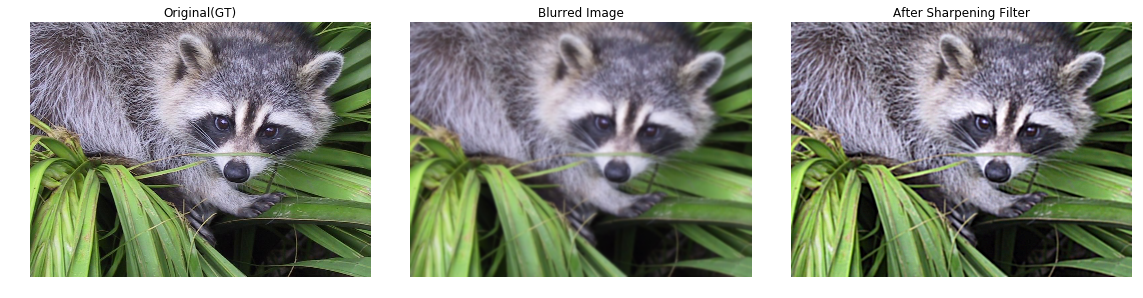

In [33]:
#################  filter 2  #################

# alpha로 튜닝 가능
# filter 1 보다 좋아보임


import cv2

def filter_2(img, alpha):
    kernel = np.zeros((9,9), np.float32)
    kernel[4,4] = alpha 
    boxFilter = (alpha-1)*np.ones((9,9), np.float32) / 81.0
    kernel = kernel - boxFilter
    sharpened = cv2.filter2D(img, -1, kernel)
    return sharpened

###############################################

sharpened_f = filter_2(blurred_f, 5)
plt.figure(figsize=(16, 4))
ax1=plt.subplot(131)
plt.imshow(f)
plt.axis('off')
ax1.set_title("Original(GT)")
ax2=plt.subplot(132)
plt.imshow(blurred_f)
plt.axis('off')
ax2.set_title("Blurred Image")
ax3=plt.subplot(133)
plt.imshow(sharpened_f)
plt.axis('off')
ax3.set_title("After Sharpening Filter")
plt.tight_layout()
plt.show()


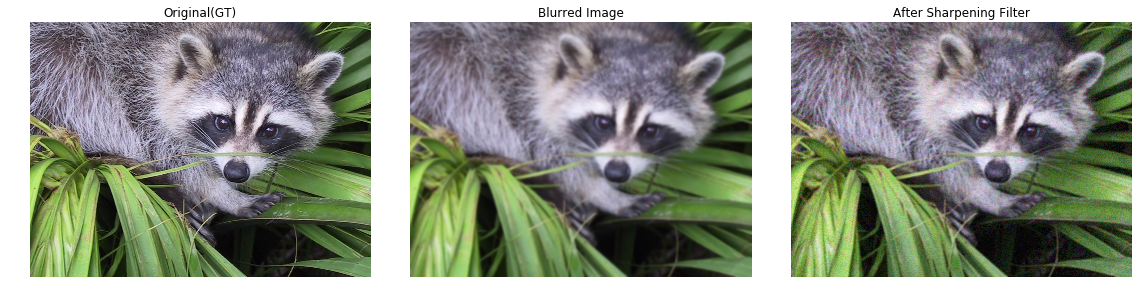

In [4]:
#################  filter 3  #################

# PIL 내장 함수 사용
# SHARPEN filter 만으로는 부족해보여서 DETAIL, EDGE_ENHANCE_MORE filter 사용
# 필요에 따라 filter 조합 변형 가능

from PIL import Image, ImageFilter

def filter_3(img):
    im = Image.fromarray(img)
    im = im.filter(ImageFilter.SHARPEN)
    im = im.filter(ImageFilter.DETAIL)
    im = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
    sharpened = im
    return sharpened

###############################################

sharpened_f = filter_3(blurred_f)
plt.figure(figsize=(16, 4))
ax1=plt.subplot(131)
plt.imshow(f)
plt.axis('off')
ax1.set_title("Original(GT)")
ax2=plt.subplot(132)
plt.imshow(blurred_f)
plt.axis('off')
ax2.set_title("Blurred Image")
ax3=plt.subplot(133)
plt.imshow(sharpened_f)
plt.axis('off')
ax3.set_title("After Sharpening Filter")
plt.tight_layout()
plt.show()

In [1]:
import scipy.misc as scm

In [2]:
img = scm.imread('HD_L_183.png')

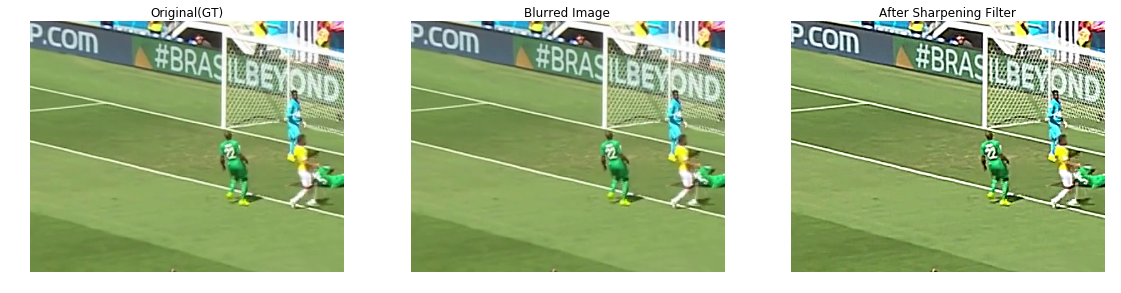

In [11]:
img.shape
# Test setting
import scipy
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2

def filter_2(img, alpha):
    kernel = np.zeros((9,9), np.float32)
    kernel[4,4] = alpha 
    boxFilter = (alpha-1)*np.ones((9,9), np.float32) / 81.0
    kernel = kernel - boxFilter
    sharpened = cv2.filter2D(img, -1, kernel)
    return sharpened

###############################################
blurred_f = img
sharpened_f = filter_2(blurred_f, 2)
plt.figure(figsize=(16, 4))
ax1=plt.subplot(131)
plt.imshow(img)
plt.axis('off')
ax1.set_title("Original(GT)")
ax2=plt.subplot(132)
plt.imshow(blurred_f)
plt.axis('off')
ax2.set_title("Blurred Image")
ax3=plt.subplot(133)
plt.imshow(sharpened_f)
plt.axis('off')
ax3.set_title("After Sharpening Filter")
plt.tight_layout()
plt.show()